**Fibonacci Search**

In [2]:
def fibonacci_search(f, l, r, n):
    # Calculate Fibonacci series up to n terms

    fib = [1, 1]
    while len(fib) <= n:
        fib.append(fib[-1] + fib[-2])

    print(fib[n])
    k = 1
    while k < n:
        # Calculate the ratio of the Fibonacci numbers
        fk = (fib[n]-k)/( fib[n]-k+1)
       # print("Value of Fk= ",fk)
        ratio = round(fk, 3)
        # x1 = d , x2 = c
        x2 = round(l + ratio * (r - l), 3)
        x1 = round((l + r) - x2, 3)

        # Evaluate the function at c and d
        fx2 = f(x2)
        fx1 = f(x1)

        # Print the current interval
        print(f"Iteration {k}: Interval = [{l}, {r}]")

        # Narrow the interval based on the function evaluations
        if fx2 < fx1:
            r = x2
        else:
            l = x1

        k += 1

    # Calculate the mean of the last interval
    final_mean = (l + r) / 2

    # Print the final interval and mean
    print(f"Final Interval: [{l}, {r}]")
    print(f"Mean of the final interval: {final_mean}")
    return final_mean

# User input for the function
function_input = input("Enter a function of x to minimize (e.g., 'x**2'): ")

# Convert the string input into a callable function
f = eval(f"lambda x: {function_input}")

# User input for the interval [l, r]
l_input = input(f"Enter Lower Bound of the interval (l): ")
r_input = input(f"Enter Upper Bound of the interval (r): ")

# Convert the inputs to integers
l = int(l_input)
r = float(r_input)

# User input for the number of iterations (n)
n = int(input("Enter the number of iterations (n): "))

# Perform the Fibonacci Search
fibonacci_search(f, l, r, n)


Enter a function of x to minimize (e.g., 'x**2'): x**2
Enter Lower Bound of the interval (l): 0
Enter Upper Bound of the interval (r): 1
Enter the number of iterations (n): 3
3
Iteration 1: Interval = [0, 1.0]
Iteration 2: Interval = [0.333, 1.0]
Final Interval: [0.666, 1.0]
Mean of the final interval: 0.833


0.833

**Golden Ratio**

In [3]:

#Minimizarion of the function using Golden Ratio
def golden_section_search(f, l, r, tol):
    golden_ratio = 0.618
    iteration = 1

    while (r - l) > tol:
        # X2 and  X1 ko meow meow kar do
        #round() function decimal ke baad values ko set kar sakte hai
        x2 =round(l + golden_ratio*(r - l),3)
        x1 =round((l+r) - x2,3)
        # Print the current interval
        print(f"Iteration {iteration}: Interval = [{l}, {r}]")

        # Evaluate the function at the interior points
        fx2 = f(x2)
        fx1 = f(x1)

        #
        if fx1 > fx2:
            r = x2
        else:
            l = x1

        iteration += 1

    # Calculate the mean of the last interval
    final_mean = (l + r) / 2

    # Print the last interval and the mean
    print(f"Final Interval: [{l}, {r}]")
    print(f"Mean of the final interval: {final_mean}")
    return final_mean

# User input for the function as a string
function_input = input("Enter a function of x to minimize (e.g., 'x**2 '): ")

# Convert the string input into a callable function
f = eval(f"lambda x: {function_input}")

# User input for the interval [a, b]
l_input = input("Enter the Lower Bound of the interval (l): ")
r_input = input("Enter the Upper Bound of the interval (r): ")

# Convert the inputs
l = int(l_input)
r = int(r_input)

# Stopping tolerance diya hua aagar ye
tol = 0.13

# Function ko call kar rahe hai yahan
golden_section_search(f, l, r, tol)


Enter a function of x to minimize (e.g., 'x**2 '): x**2
Enter the Lower Bound of the interval (l): 0
Enter the Upper Bound of the interval (r): 1
Iteration 1: Interval = [0, 1]
Iteration 2: Interval = [0.382, 1]
Iteration 3: Interval = [0.618, 1]
Iteration 4: Interval = [0.764, 1]
Iteration 5: Interval = [0.854, 1]
Final Interval: [0.91, 1]
Mean of the final interval: 0.9550000000000001


0.9550000000000001

**Lanrange Method**

In [4]:
import sympy as sp
from sympy import *

#function_input = input("Enter a Objective function function: ")

# Convert the string input into a callable function
x,y,l=sp.symbols('x,y,l')

# Take user inputs
#z_fun = input("Enter the expression for z_fun (in terms of x and y) ex(4*x**2 - 2*x*y + 6*y**2): ")
#constraint = input("Enter the expression for constraint (in terms of x, y, and l)(72*l -x*l-l*y): ")
#gx = float(input("Enter the value for gx: "))
#gy = float(input("Enter the value for gy: "))

# Convert string inputs into sympy expressions
#z_fun = sp.sympify(z_fun_input)
#constraint = sp.sympify(constraint_input)

ob_fun= 4*x**2 - 2*x*y + 6*y**2 + 72*l -x*l-l*y
z_fun = 4*x**2 - 2*x*y + 6*y**2
constraint = 72*l -x*l-l*y

ob_fun = (z_fun) + (constraint)

print("Expression : {}".format(ob_fun))

# Use sympy.Derivative() method
diff_x = sp.diff(ob_fun, x)
diff_y = sp.diff(ob_fun, y)
diff_l = sp.diff(ob_fun, l)
gx=-1
gy=-1

print("Value of the derivative : {} ".format(diff_x.doit()))


print("Value of the derivative : {} ".format(diff_y.doit()))

print("Value of the derivative : {} ".format(diff_l.doit()))

solutions = sp.solve([diff_x, diff_y, diff_l], (x, y, l))

# Display the solutions
#print("\nSolutions:")
#for var, value in solutions.items():
#    print(f"{var} = {value}")


diff_xx = sp.diff(diff_x, x)

diff_xy = sp.diff(diff_x, y)

diff_yx = sp.diff(diff_y, x)

diff_yy = sp.diff(diff_y, y)

determinants=diff_xx*(0-gy*gy)-diff_xy*(0-gy*gx)+gx*(diff_yx*gy - diff_yy*gx)
print(determinants)

x_sol = solutions[x]
y_sol = solutions[y]
l_sol = solutions[l]

# Display the stored solutions
#print("\nStored Solutions:")
print(f"x = {x_sol}")
print(f"y = {y_sol}")
print(f"λ = {l_sol}")

def zmin(x, y):
    return 4*(x**2) - 2*x*y + 6*y**2

def zmax(x, y):
    return 4*x**2 - 2*x*y + 6*y**2

# Check the determinant to determine if it's a minimum or maximum
if determinants > 0:
    zmax_value = zmax(x_sol, y_sol)
    print("Z max =", zmax_value)
else:
    zmin_value = zmin(x_sol, y_sol)
    print("Z min =", zmin_value)


Expression : -l*x - l*y + 72*l + 4*x**2 - 2*x*y + 6*y**2
Value of the derivative : -l + 8*x - 2*y 
Value of the derivative : -l - 2*x + 12*y 
Value of the derivative : -x - y + 72 
-24
x = 42
y = 30
λ = 276
Z min = 9936


**Linear Programming **

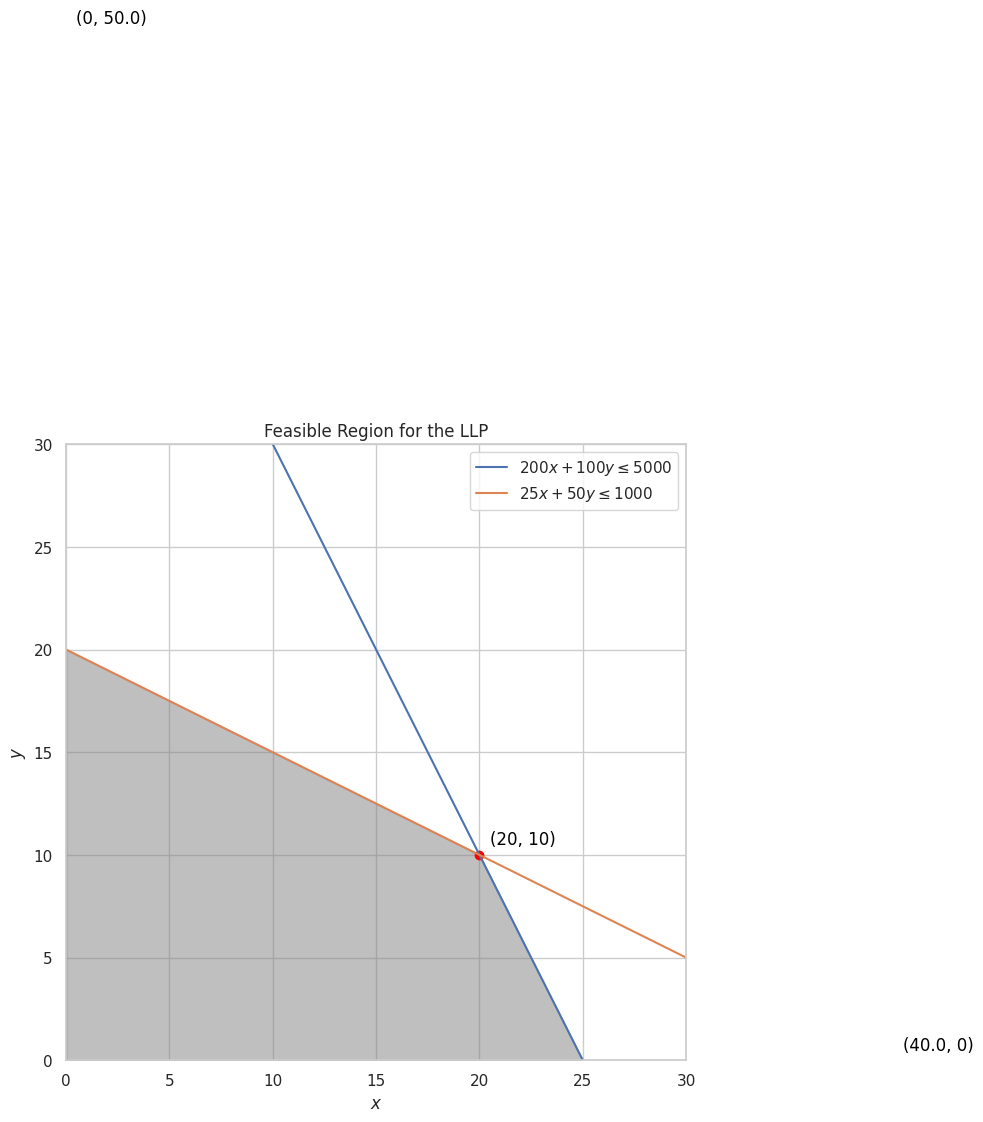

In [15]:
#Linear Programming
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the inequalities as functions
x = np.linspace(0, 30, 400)
y1 = (5000 - 200 * x) / 100
y2 = (1000 - 25 * x) / 50

# Set up the plot
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")

# Plot the lines
plt.plot(x, y1, label=r'$200x + 100y \leq 5000$')
plt.plot(x, y2, label=r'$25x + 50y \leq 1000$')

# Fill the feasible region
plt.fill_between(x, np.minimum(y1, y2), where=(y1 >= 0) & (y2 >= 0), color='gray', alpha=0.5)

# Axis labels
plt.xlim((0, 30))
plt.ylim((0, 30))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# Add a legend
plt.legend()

# Calculate corner points
corners = [
    (0, 5000/100),  # Intersection with y-axis from the first equation
    (1000/25, 0),   # Intersection with x-axis from the second equation
    (20, 10)        # Intersection of the two lines
]

# Mark the feasible region's vertices
for corner in corners:
    plt.scatter(*corner, color='red')
    plt.text(corner[0] + 0.5, corner[1] + 0.5, f'{corner}', fontsize=12, color='black')

# Display the plot
plt.title('Feasible Region for the LLP')
plt.show()


**Simplex Method**

In [9]:
import numpy as np
from scipy.optimize import linprog

def main():
    # Get the number of variables
    num_vars = int(input("Enter the number of variables: "))

    # Get coefficients of the objective function
    print("Enter the coefficients of the objective function (space-separated):")
    c = list(map(float, input().split()))
    c = [-coef for coef in c]  # Negate for minimization (since linprog minimizes by default)

    # Get the number of constraints
    num_constraints = int(input("Enter the number of constraints: "))

    A = []
    b = []

    # Input each constraint
    for i in range(num_constraints):
        print(f"Enter the coefficients for constraint {i + 1} (space-separated):")
        constraint = list(map(float, input().split()))
        A.append(constraint)

        print(f"Enter the right-hand side value for constraint {i + 1}:")
        rhs = float(input())
        b.append(rhs)

    # Get variable bounds
    bounds = []
    for i in range(num_vars):
        print(f"Enter the bounds for variable x{i + 1} (min max, space-separated, or just hit enter for [0, None]):")
        bounds_input = input()
        if bounds_input:
            bounds.append(tuple(map(float, bounds_input.split())))
        else:
            bounds.append((0, None))  # Default non-negativity

    # Run the Simplex method
    result = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')

    # Display the results
    if result.success:
        print(f"Optimal value: {-result.fun}")  # Negate again to get the max value
        for i in range(num_vars):
            print(f"x{i + 1}: {result.x[i]}")
    else:
        print("No solution found.")

# Fix the name check block
if __name__ == "__main__":
    main()


Enter the number of variables: 3
Enter the coefficients of the objective function (space-separated):
1 1 3
Enter the number of constraints: 2
Enter the coefficients for constraint 1 (space-separated):
3 2 1
Enter the right-hand side value for constraint 1:
3
Enter the coefficients for constraint 2 (space-separated):
2 1 2
Enter the right-hand side value for constraint 2:
2
Enter the bounds for variable x1 (min max, space-separated, or just hit enter for [0, None]):

Enter the bounds for variable x2 (min max, space-separated, or just hit enter for [0, None]):

Enter the bounds for variable x3 (min max, space-separated, or just hit enter for [0, None]):

Optimal value: 3.0
x1: 0.0
x2: 0.0
x3: 1.0


**North West Cornor Rule for Balanced Problem**

In [10]:

supply = [20, 30, 50]
demand = [30, 40, 30]
cost = [[8, 6, 10],
        [9, 12, 13],
        [14, 9, 16]]

rows = len(supply)
cols = len(demand)


allocation = [[0] * cols for _ in range(rows)]


i = 0
j = 0

while i < rows and j < cols:
    allocation_amount = min(supply[i], demand[j])
    allocation[i][j] = allocation_amount
    supply[i] -= allocation_amount
    demand[j] -= allocation_amount


    if supply[i] == 0:
        i += 1
    if demand[j] == 0:
        j += 1

print("Allocation Matrix:")
for row in allocation:
    print(row)

total_cost = 0
for i in range(rows):
    for j in range(cols):
        total_cost += allocation[i][j] * cost[i][j]

print(f"Total Cost: {total_cost}")


Allocation Matrix:
[20, 0, 0]
[10, 20, 0]
[0, 20, 30]
Total Cost: 1150


**North West Cornor Rule for Unbalanced Problem**

In [11]:

supply = [20, 30, 50]
demand = [30, 40, 50]
cost = [[8, 6, 10],
        [9, 12, 13],
        [14, 9, 16]]

rows = len(supply)
cols = len(demand)

total_supply = sum(supply)
total_demand = sum(demand)

if total_supply < total_demand:

    supply.append(total_demand - total_supply)
    dummy_row = [0] * cols
    cost.append(dummy_row)
    print(f"Added a dummy supply row with supply {total_demand - total_supply}")
elif total_demand < total_supply:

    demand.append(total_supply - total_demand)
    for i in range(rows):
        cost[i].append(0)
    print(f"Added a dummy demand column with demand {total_supply - total_demand}")

rows = len(supply)
cols = len(demand)

allocation = [[0] * cols for _ in range(rows)]


i = 0
j = 0

while i < rows and j < cols:
    allocation_amount = min(supply[i], demand[j])
    allocation[i][j] = allocation_amount
    supply[i] -= allocation_amount
    demand[j] -= allocation_amount


    if supply[i] == 0:
        i += 1
    if demand[j] == 0:
        j += 1

print("Allocation Matrix:")
for row in allocation:
    print(row)

total_cost = 0
for i in range(rows):
    for j in range(cols):
        total_cost += allocation[i][j] * cost[i][j]

print(f"Total Cost: {total_cost}")


Added a dummy supply row with supply 20
Allocation Matrix:
[20, 0, 0]
[10, 20, 0]
[0, 20, 30]
[0, 0, 20]
Total Cost: 1150


** Transportation problem using the least cost method**

In [12]:
supply = [20, 30, 50]
demand = [30, 40, 50]
cost = [[8, 6, 10],
        [9, 12, 13],
        [14, 9, 16]]

rows = len(supply)
cols = len(demand)

total_supply = sum(supply)
total_demand = sum(demand)

# Balancing supply and demand if they are not equal
if total_supply < total_demand:
    supply.append(total_demand - total_supply)
    dummy_row = [0] * cols
    cost.append(dummy_row)
    print(f"Added a dummy supply row with supply {total_demand - total_supply}")
elif total_demand < total_supply:
    demand.append(total_supply - total_demand)
    for i in range(rows):
        cost[i].append(0)
    print(f"Added a dummy demand column with demand {total_supply - total_demand}")

rows = len(supply)
cols = len(demand)

allocation = [[0] * cols for _ in range(rows)]

# Creating a list of all cell positions sorted by cost
cell_costs = [(i, j, cost[i][j]) for i in range(rows) for j in range(cols)]
cell_costs.sort(key=lambda x: x[2])  # Sort by the cost value

for i, j, _ in cell_costs:
    if supply[i] > 0 and demand[j] > 0:
        allocation_amount = min(supply[i], demand[j])
        allocation[i][j] = allocation_amount
        supply[i] -= allocation_amount
        demand[j] -= allocation_amount

print("Allocation Matrix:")
for row in allocation:
    print(row)

# Calculating total cost
total_cost = 0
for i in range(rows):
    for j in range(cols):
        total_cost += allocation[i][j] * cost[i][j]

print(f"Total Cost: {total_cost}")


Added a dummy supply row with supply 20
Allocation Matrix:
[0, 20, 0]
[10, 0, 20]
[0, 20, 30]
[20, 0, 0]
Total Cost: 1130


**Transportation problem using the Vogel's Approximation Method**

In [13]:
supply = [20, 30, 50]
demand = [30, 40, 50]
cost = [[8, 6, 10],
        [9, 12, 13],
        [14, 9, 16]]

rows = len(supply)
cols = len(demand)

total_supply = sum(supply)
total_demand = sum(demand)

# Balancing the problem if needed
if total_supply < total_demand:
    supply.append(total_demand - total_supply)
    dummy_row = [0] * cols
    cost.append(dummy_row)
    print(f"Added a dummy supply row with supply {total_demand - total_supply}")
elif total_demand < total_supply:
    demand.append(total_supply - total_demand)
    for i in range(rows):
        cost[i].append(0)
    print(f"Added a dummy demand column with demand {total_supply - total_demand}")

rows = len(supply)
cols = len(demand)

allocation = [[0] * cols for _ in range(rows)]

# Vogel's Approximation Method
def calculate_penalties(cost, supply, demand):
    penalties = []

    for i in range(rows):
        if supply[i] == 0:
            penalties.append(None)  # Ignore rows with no supply
            continue
        sorted_row_costs = sorted([cost[i][j] for j in range(cols) if demand[j] > 0])
        if len(sorted_row_costs) >= 2:
            penalties.append(sorted_row_costs[1] - sorted_row_costs[0])
        else:
            penalties.append(sorted_row_costs[0])  # If only one cost is available
    row_penalties = penalties[:]

    penalties = []
    for j in range(cols):
        if demand[j] == 0:
            penalties.append(None)  # Ignore columns with no demand
            continue
        sorted_col_costs = sorted([cost[i][j] for i in range(rows) if supply[i] > 0])
        if len(sorted_col_costs) >= 2:
            penalties.append(sorted_col_costs[1] - sorted_col_costs[0])
        else:
            penalties.append(sorted_col_costs[0])  # If only one cost is available
    col_penalties = penalties[:]

    return row_penalties, col_penalties

while any(supply) and any(demand):
    row_penalties, col_penalties = calculate_penalties(cost, supply, demand)

    max_row_penalty = max((p, i) for i, p in enumerate(row_penalties) if p is not None)
    max_col_penalty = max((p, j) for j, p in enumerate(col_penalties) if p is not None)

    if max_row_penalty[0] >= max_col_penalty[0]:
        i = max_row_penalty[1]
        j = min((cost[i][j], j) for j in range(cols) if demand[j] > 0)[1]
    else:
        j = max_col_penalty[1]
        i = min((cost[i][j], i) for i in range(rows) if supply[i] > 0)[1]

    allocation_amount = min(supply[i], demand[j])
    allocation[i][j] = allocation_amount
    supply[i] -= allocation_amount
    demand[j] -= allocation_amount

print("Allocation Matrix:")
for row in allocation:
    print(row)

total_cost = 0
for i in range(rows):
    for j in range(cols):
        total_cost += allocation[i][j] * cost[i][j]

print(f"Total Cost: {total_cost}")


Added a dummy supply row with supply 20
Allocation Matrix:
[0, 0, 20]
[30, 0, 0]
[0, 40, 10]
[0, 0, 20]
Total Cost: 990


**Assignment Problem**

In [14]:
import numpy as np

def hungarian_method(cost_matrix):

    for i in range(len(cost_matrix)):
        cost_matrix[i] -= cost_matrix[i].min()


    for j in range(len(cost_matrix[0])):
        cost_matrix[:, j] -= cost_matrix[:, j].min()


    def cover_zeros(matrix):
        n = len(matrix)
        row_cover = [False] * n
        col_cover = [False] * n
        zero_marks = np.zeros_like(matrix, dtype=int)

        while True:

            for i in range(n):
                for j in range(n):
                    if matrix[i][j] == 0 and not row_cover[i] and not col_cover[j]:
                        zero_marks[i][j] = 1
                        row_cover[i] = True
                        col_cover[j] = True
                        break


            row_cover = [False] * n
            col_cover = [False] * n


            for i in range(n):
                if 1 in zero_marks[i]:
                    row_cover[i] = True
            for j in range(n):
                if 1 in zero_marks[:, j]:
                    col_cover[j] = True

            covered_rows = sum(row_cover)
            covered_cols = sum(col_cover)
            if covered_rows + covered_cols >= n:
                break


            uncovered_min = float('inf')
            for i in range(n):
                for j in range(n):
                    if not row_cover[i] and not col_cover[j]:
                        uncovered_min = min(uncovered_min, matrix[i][j])

            for i in range(n):
                for j in range(n):
                    if not row_cover[i] and not col_cover[j]:
                        matrix[i][j] -= uncovered_min
                    if row_cover[i] and col_cover[j]:
                        matrix[i][j] += uncovered_min

        return zero_marks


    zero_marks = cover_zeros(cost_matrix.copy())
    assignment = np.zeros_like(cost_matrix, dtype=int)

    for i in range(len(cost_matrix)):
        for j in range(len(cost_matrix[i])):
            if zero_marks[i][j] == 1:
                assignment[i][j] = 1

    return assignment


cost = [
    [4, 3, 6, 2, 7],
    [10, 12, 11, 14, 16],
    [4, 3, 2, 1, 5],
    [8, 7, 6, 9, 6]
]

cost_matrix = np.array(cost, dtype=float)
assignment_matrix = hungarian_method(cost_matrix.copy())
total_cost = np.sum(cost_matrix * assignment_matrix)

print("Assignment Matrix:")
print(assignment_matrix)
print(f"Total Cost: {total_cost}")


Assignment Matrix:
[[0 1 0 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]]
Total Cost: 20.0
